### importing libraries required

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


### importing data from excel files to dataframe

In [2]:
df_plants = pd.read_excel('Data.xlsx',sheet_name='plants')
df_flight = pd.read_excel('Data.xlsx',sheet_name='flight dates') 
df_planting = pd.read_excel('Data.xlsx',sheet_name='planting')
df_weather = pd.read_excel('Data.xlsx',sheet_name='weather') 

## Planting data

In [3]:
df_planting

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0
...,...,...,...,...,...,...,...,...,...,...
2368,Ice 309,NaN,NaN,"2,1",NaN,387.0,NaN,NaN,NaN,80.0
2369,Ice 309,NaN,NaN,"2,2",NaN,400.0,NaN,NaN,NaN,274.0
2370,Ice 309,NaN,NaN,"2,3",NaN,319.0,NaN,NaN,NaN,224.0
2371,Ice 309,NaN,NaN,"2,4",NaN,155.0,NaN,NaN,NaN,249.0


In [4]:
df_planting.shape

(2373, 10)

In [5]:
df_planting.isnull().sum(axis = 0)

Crop               420
Column2           2373
Column3           2373
Plant_Date         420
Column1           2373
Region             420
Column4           2373
Planting_Batch     551
Volume_Planted     552
Planting_Wk        420
dtype: int64

In [6]:
df_planting.dtypes

Crop               object
Column2           float64
Column3           float64
Plant_Date         object
Column1           float64
Region            float64
Column4           float64
Planting_Batch     object
Volume_Planted    float64
Planting_Wk       float64
dtype: object

### selecting data which have planting_batch and dropping the column with all nan values

In [7]:
df_planting_cp = df_planting[df_planting['Planting_Batch'].notna()]
df_planting_cp.dropna(axis=1, how='all',inplace=True)
#df_planting_cp.dropna(axis=0,inplace=True)
#df_planting_cp.drop(['Column2','Column3','Column1','Column4'], inplace=True, axis=1)
#df_planting.drop(df_planting.index[1822:],inplace=True)

/Users/sundaracharya/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
df_planting_cp.isnull().sum(axis = 0)

Crop              0
Plant_Date        0
Region            0
Planting_Batch    0
Volume_Planted    1
Planting_Wk       0
dtype: int64

In [9]:
df_planting_cp = df_planting_cp.dropna()
#df_planting_cp=df_planting_cp.fillna(df_planting_cp['Volume_Planted'].mean())

In [10]:
df_planting_cp.isnull().sum(axis = 0)

Crop              0
Plant_Date        0
Region            0
Planting_Batch    0
Volume_Planted    0
Planting_Wk       0
dtype: int64

<AxesSubplot:xlabel='Plant_Date', ylabel='Volume_Planted'>

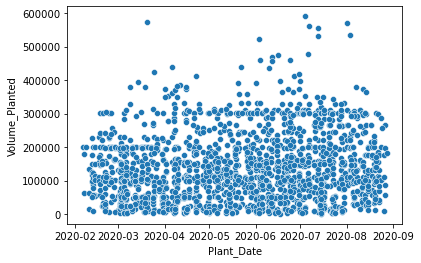

In [11]:
sns.scatterplot(data=df_planting_cp, x="Plant_Date", y="Volume_Planted")

<AxesSubplot:xlabel='Plant_Date', ylabel='Planting_Wk'>

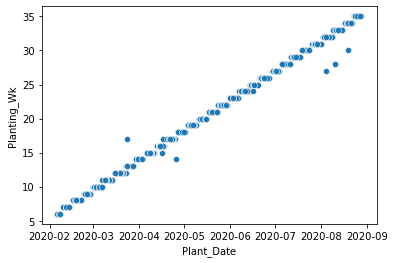

In [12]:
sns.scatterplot(data=df_planting_cp, x="Plant_Date", y="Planting_Wk")

In [13]:
df_planting_cp.isnull().sum(axis = 0)

Crop              0
Plant_Date        0
Region            0
Planting_Batch    0
Volume_Planted    0
Planting_Wk       0
dtype: int64

In [14]:
df_planting_cp

,Crop,Plant_Date,Region,Planting_Batch,Volume_Planted,Planting_Wk
0,3,2020-02-06 00:00:00,0.0,392,198912.0,6.0
1,3,2020-02-07 00:00:00,0.0,503,63840.0,6.0
2,3,2020-02-07 00:00:00,0.0,614,179928.0,6.0
3,3,2020-02-08 00:00:00,0.0,725,200256.0,6.0
4,3,2020-02-10 00:00:00,0.0,770,13944.0,7.0
...,...,...,...,...,...,...
1816,1,2020-08-12 00:00:00,1.0,158,142500.0,33.0
1817,1,2020-08-21 00:00:00,1.0,388,98208.0,34.0
1818,1,2020-08-25 00:00:00,1.0,390,256358.0,35.0
1819,1,2020-08-27 00:00:00,1.0,389,85500.0,35.0


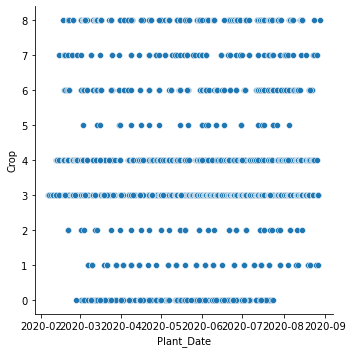

In [15]:
sns.relplot(
    data=df_planting_cp, x="Plant_Date", y="Crop",
    kind="scatter"
)

In [16]:
#df_planting_cp=df_planting_cp[df_planting_cp['Volume_Planted'].notna()]

### flight data preprocessing

In [17]:
df_flight.shape

(50, 2)

In [18]:
df_flight.dtypes

Batch Number             int64
Flight Date     datetime64[ns]
dtype: object

In [19]:
df_flight.head()

,Batch Number,Flight Date
0,402,2020-04-30
1,408,2020-04-30
2,409,2020-04-30
3,466,2020-07-01
4,467,2020-07-01


In [20]:
df_flight.isnull().sum(axis = 0)

Batch Number    0
Flight Date     0
dtype: int64

In [21]:
df_flight_cp = df_flight.copy()
df_flight_cp.columns = df_flight_cp.columns.str.replace(' ','_')

In [22]:
df_flight_cp.dropna(axis=1, how='all',inplace=True)
#df_flight_cp.dropna(axis=0,inplace=True)

In [23]:
df_flight_cp.isnull().sum(axis = 0)

Batch_Number    0
Flight_Date     0
dtype: int64

# weather data pre-processing

In [24]:
df_weather.head()

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [25]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   int64         
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Wind Speed [max]         2556 non-null   float64       
 5   Battery Voltage [last]   2556 non-null   int64         
 6   Leaf Wetness [time]      2556 non-null   int64         
 7   Air Temperature [avg]    2556 non-null   float64       
 8   Air Temperature [max]    2556 non-null   float64       
 9   Air Temperature [min]    2556 non-null   float64       
 10  Relative Humidity [avg]  2556 non-null   float64       
 11  Dew Point [avg]          2553 non-null   float64       
 12  Dew Point [min]          2510 non-

In [26]:
df_weather.shape

(2556, 14)

In [27]:
df_weather.describe()

,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2553.000000,2510.000000,2490.000000
mean,108.509781,1.510720,2.699022,5.709703,6792.417058,187.359155,10.654112,15.463826,5.816236,85.922707,7.957188,4.882789,1.815542
std,84.820065,4.291076,1.582493,2.347790,61.085675,335.230723,5.501036,6.832950,5.050598,11.010210,4.582318,4.551633,1.319795
min,0.000000,0.000000,0.000000,0.000000,6572.000000,0.000000,-4.640000,-2.760000,-7.550000,0.000000,-6.400000,-14.500000,0.100000
25%,34.000000,0.000000,1.500000,4.100000,6756.000000,0.000000,6.497500,10.275000,2.097500,78.370000,4.400000,1.000000,0.700000
50%,85.000000,0.200000,2.400000,5.300000,6776.000000,0.000000,10.410000,14.615000,5.700000,86.865000,7.900000,4.700000,1.500000
75%,169.000000,1.200000,3.600000,7.000000,6816.000000,251.250000,15.030000,20.545000,9.662500,95.160000,11.500000,8.300000,2.800000
max,382.000000,117.400000,10.300000,18.100000,7176.000000,1440.000000,27.230000,39.690000,23.370000,100.000000,20.200000,18.400000,7.600000


/Users/sundaracharya/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


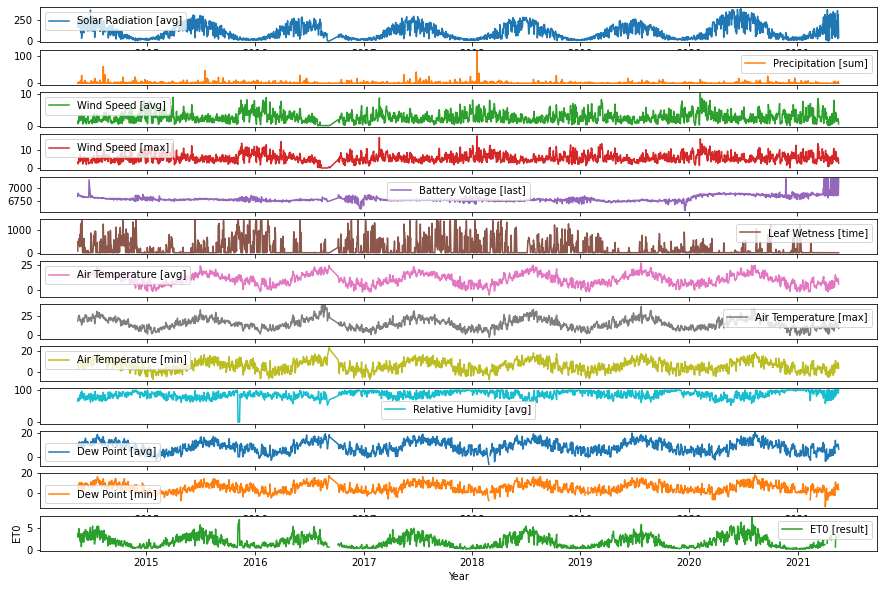

In [28]:
fig, axes = plt.subplots(figsize=(15,10))
df_weather.plot(subplots=True,ax=axes,x='Unnamed: 0')
plt.xlabel('Year')
plt.ylabel('ET0')
plt.savefig('original_weather_over_time.png')

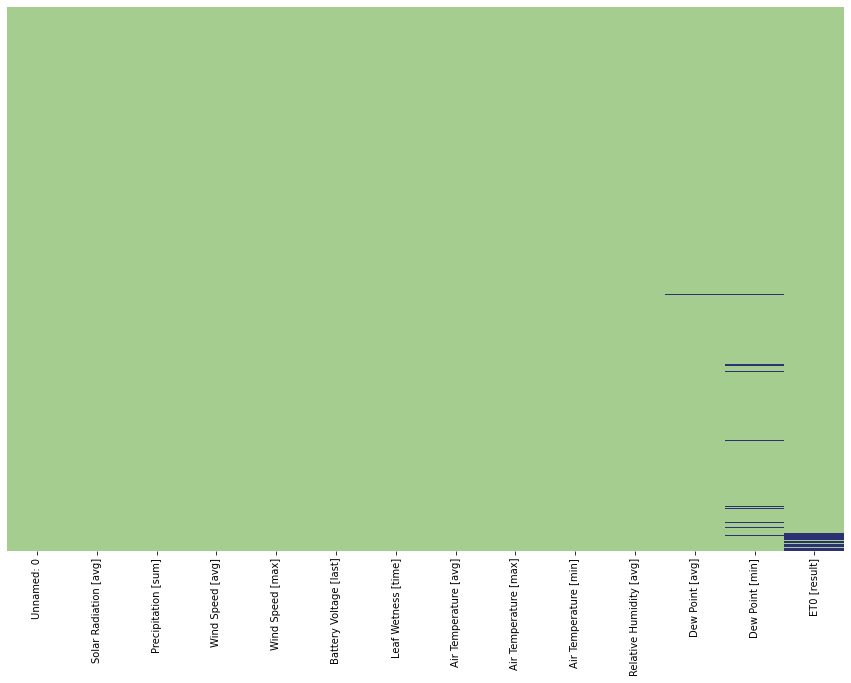

In [29]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(df_weather.isnull(),yticklabels=False,cbar=False,cmap="crest")
plt.savefig('weather_missing_data.png')

#### imputing weather NaN value with mean

In [30]:
#df_weather_cp=df_weather.fillna(df_weather.mean())
df_weather_cp = df_weather

In [31]:
df_weather_cp.isnull().sum(axis = 0)

Unnamed: 0                  0
Solar Radiation [avg]       0
Precipitation [sum]         0
Wind Speed [avg]            0
Wind Speed [max]            0
Battery Voltage [last]      0
Leaf Wetness [time]         0
Air Temperature [avg]       0
Air Temperature [max]       0
Air Temperature [min]       0
Relative Humidity [avg]     0
Dew Point [avg]             3
Dew Point [min]            46
ET0 [result]               66
dtype: int64

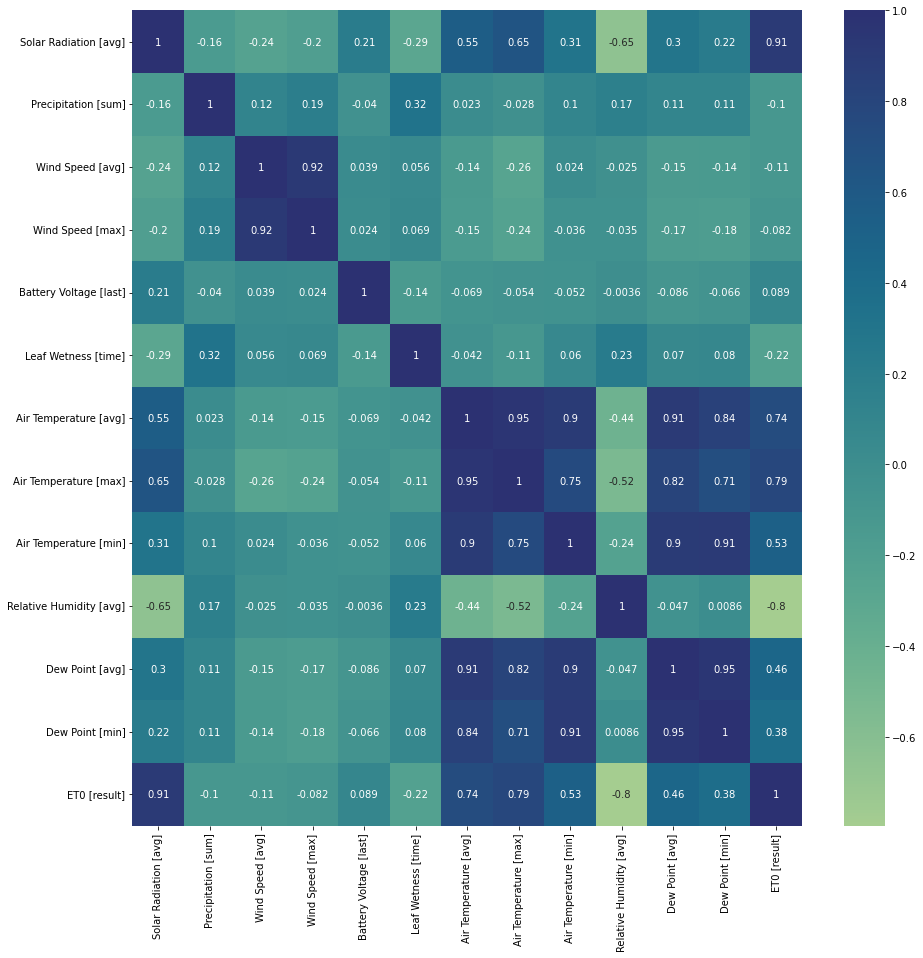

In [32]:
plt.figure(figsize=(15,15))
correlation=df_weather_cp.corr()
fig = sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True, cmap = 'crest')

In [33]:
weather_corr = df_weather_cp.corr()
threshold = 0.92
columns = np.full((weather_corr.shape[0]),True,dtype=bool)
for i in range(weather_corr.shape[0]):
    for j in range(i+1,weather_corr.shape[0]):
        if weather_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j]=False
cols = np.concatenate(([True],columns),axis=0)
print(cols)
selected_columns = df_weather_cp.columns[cols]
df_weather_cp = df_weather_cp[selected_columns]
df_weather_cp.head()

[ True  True  True  True  True  True  True  True False  True  True  True
 False  True]


,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,7.19,64.95,7.0,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,3.04,72.91,7.6,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,7.23,74.69,10.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,9.93,71.42,11.5,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,8.45,74.45,11.4,4.2


In [34]:
df_weather_cp.shape

(2556, 12)

Here, we can see the high correlation on different columns
1. Dew Point[avg] with Dew Point [min]
2. Air Temperature[avg] with max

So, we remove the correlated columns and use remaining for further process

In [35]:
#df_weather_new = df_weather_cp.drop(['Dew Point [min]','Air Temperature [max]','Air Temperature [min]','Wind Speed [max]'],axis=1)

In [36]:
df_weather_cp.isnull().sum(axis = 0)

Unnamed: 0                  0
Solar Radiation [avg]       0
Precipitation [sum]         0
Wind Speed [avg]            0
Wind Speed [max]            0
Battery Voltage [last]      0
Leaf Wetness [time]         0
Air Temperature [avg]       0
Air Temperature [min]       0
Relative Humidity [avg]     0
Dew Point [avg]             3
ET0 [result]               66
dtype: int64

In [37]:
df_weather_cp['Dew Point [avg]'].interpolate(limit_direction ='both',method='polynomial', order=3,inplace=True)

/Users/sundaracharya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6915: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [38]:
df_weather_cp.isnull().sum(axis=0)

Unnamed: 0                  0
Solar Radiation [avg]       0
Precipitation [sum]         0
Wind Speed [avg]            0
Wind Speed [max]            0
Battery Voltage [last]      0
Leaf Wetness [time]         0
Air Temperature [avg]       0
Air Temperature [min]       0
Relative Humidity [avg]     0
Dew Point [avg]             0
ET0 [result]               66
dtype: int64


Since, we need the weather ETO data, we have to predict this data

In [39]:
ETO_pred_weather = df_weather_cp[df_weather_cp['ET0 [result]'].isna()]

In [40]:
ETO_pred_weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,7.19,64.95,7.0,NaN
839,2016-09-08,0,0.0,0.0,0.0,6748,0,22.57,21.85,70.00,16.6,NaN
1268,2017-12-09,24,0.0,3.3,5.2,6844,0,0.37,-1.62,99.22,1.0,NaN
1269,2017-12-10,9,7.0,2.2,4.8,6826,905,0.17,-3.55,99.66,0.5,NaN
1270,2017-12-11,8,4.0,3.2,5.9,6766,1030,1.60,-0.55,98.52,1.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2021-05-16,281,0.4,1.8,4.7,6874,0,11.41,6.07,92.04,9.8,NaN
2550,2021-05-17,26,0.0,2.3,4.4,7070,0,9.45,8.95,99.87,9.3,NaN
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,8.95,99.86,10.3,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,8.38,99.86,10.6,NaN


In [41]:
ET0_new_weather = df_weather_cp[df_weather_cp['ET0 [result]'].notnull()]
ET0_new_weather = ET0_new_weather.drop(['Unnamed: 0'],axis=1)

In [42]:
train = ET0_new_weather.drop(['ET0 [result]'],axis=1)
valid = ET0_new_weather['ET0 [result]']

In [43]:
x_train,x_valid, y_train, y_valid = train_test_split(train,valid,  random_state=10,train_size=0.85)


Visulaizing outliers in data

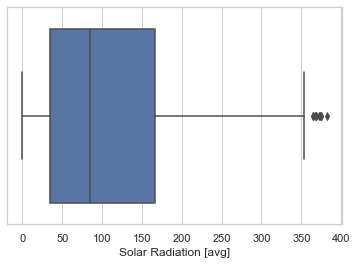

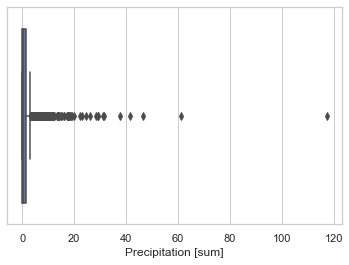

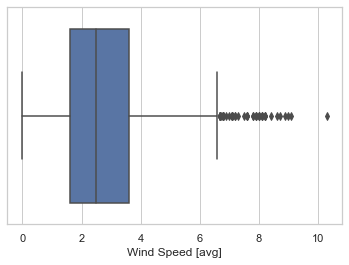

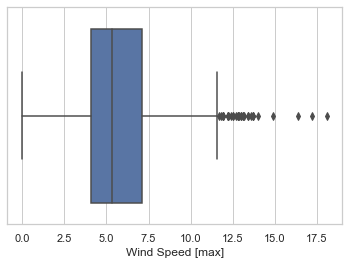

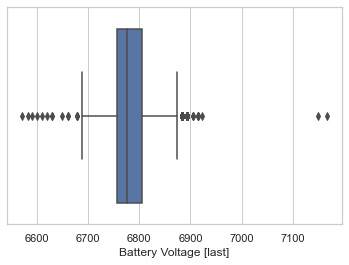

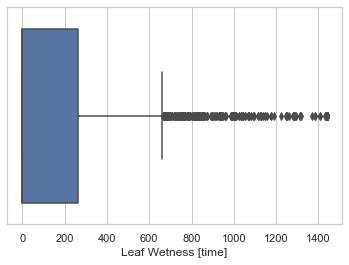

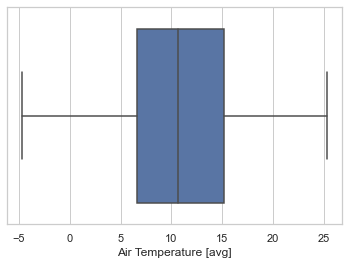

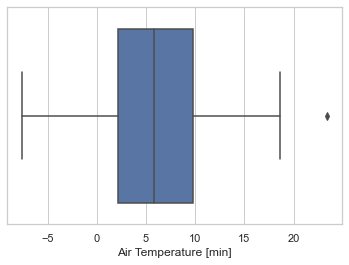

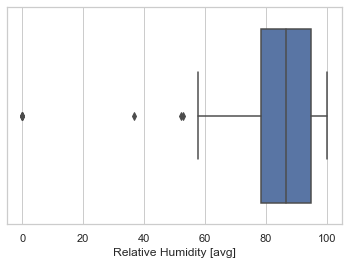

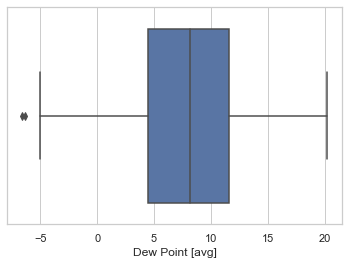

In [44]:
sns.set_theme(style="whitegrid")
for feature in x_train:
    sns.boxplot(x=x_train[feature])
    plt.show()


we can see the data is skewed for all the coulmns except Air Temperature (avg), we try to transform data

In [45]:
# Continuous variable columns
cont_features = x_train.dtypes[x_train.dtypes!='object'].index
# get columns which are skewed
skewed_features = x_train[cont_features].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewed_features})
skewness

,Skew
Precipitation [sum],11.711211
Leaf Wetness [time],1.972413
Wind Speed [avg],0.976720
Battery Voltage [last],0.907456
Wind Speed [max],0.759167
Solar Radiation [avg],0.754755
Air Temperature [avg],0.035534
Air Temperature [min],0.006785
Dew Point [avg],-0.027682
Relative Humidity [avg],-1.402582



We'll only consider the skewness other than the range (-0.5,0.5)

In [46]:
skewed_dist=skewness.loc[(skewness.Skew < -0.5) | (skewness.Skew>0.5)]
skewed_dist

,Skew
Precipitation [sum],11.711211
Leaf Wetness [time],1.972413
Wind Speed [avg],0.976720
Battery Voltage [last],0.907456
Wind Speed [max],0.759167
Solar Radiation [avg],0.754755
Relative Humidity [avg],-1.402582


In [47]:
normal_dist=skewness[~skewness.isin(skewed_dist)].dropna(how = 'all')
normal_dist

,Skew
Air Temperature [avg],0.035534
Air Temperature [min],0.006785
Dew Point [avg],-0.027682


## Outlier capping

In [48]:
for d,row in normal_dist.iterrows():
    # upper bound calculation
    upper_bound = x_train[d].mean() + 3 * x_train[d].std()
    lower_bound = x_train[d].mean() - 3 * x_train[d].std()
    # upper and lower bound capping
    x_train.loc[x_train[d]>=upper_bound,d]=upper_bound
    x_train.loc[x_train[d]<=lower_bound,d]=lower_bound

/Users/sundaracharya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [49]:
for d,row in skewed_dist.iterrows():
    #inter quartile range of features with skewed distribution
    Inter_Qrart_Range = x_train[d].quantile(0.75)-x_train[d].quantile(0.25)
    
    # calculation of lower and upper bridge
    low_bridge=x_train[d].quantile(0.25)-(3*Inter_Qrart_Range)
    up_bridge=x_train[d].quantile(0.75)+(3*Inter_Qrart_Range)
    
    # if value is less than lower bridge it is capped with lower bridge value else with upper bridge value
    x_train.loc[x_train[d]<=low_bridge,d]=low_bridge
    x_train.loc[x_train[d]>=up_bridge,d]=up_bridge

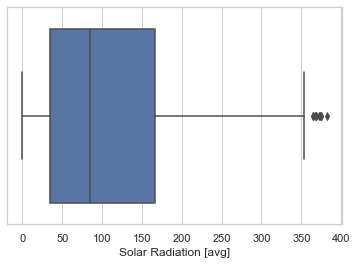

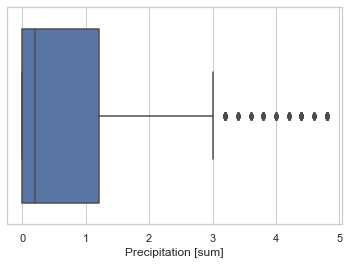

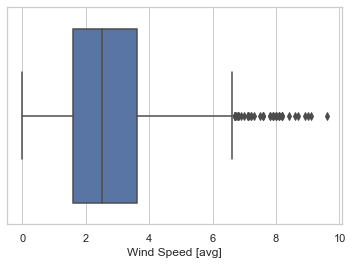

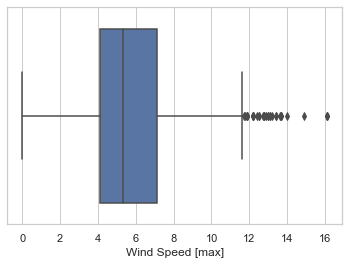

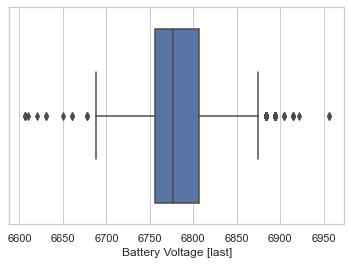

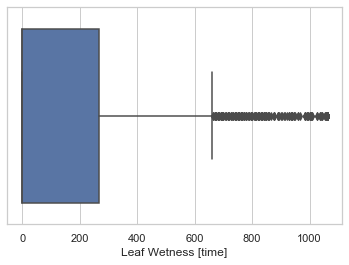

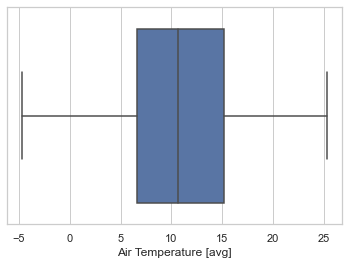

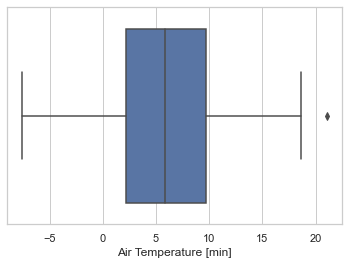

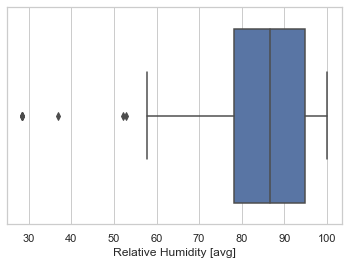

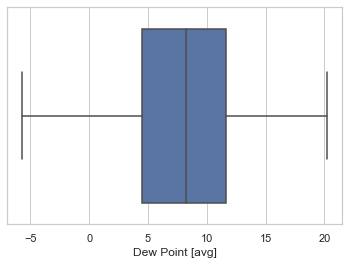

In [50]:
sns.set_theme(style="whitegrid")
for feature in x_train:
    sns.boxplot(x=x_train[feature])
    plt.show()


Now ther outliers are capped, we proceed with model training and ET0 prediction

## model training for weather

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,train_size=0.7,random_state=20)

In [52]:
error_details = {
    'Model':[],
    'MSE':[],
    'r2':[]
}

### Linear Regressor

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr = LinearRegression(fit_intercept=False)
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
r2 = r2_score(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
error_details['Model'].append('Linear Regressor')
error_details['r2'].append(r2*100)
error_details['MSE'].append(mse*100)
print('R2 : {}% \nMean Squared Error: {}%'.format(r2*100,mse*100))

R2 : 95.09503139663849% 
Mean Squared Error: 7.84198106111251%


### MLP

In [54]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=2,hidden_layer_sizes=(70,110,120,60),activation="logistic",max_iter=500)
mlp.fit(x_train,y_train)
y_predict = mlp.predict(x_test)
r2 = r2_score(y_predict,y_test)
mse = mean_squared_error(y_predict,y_test)
error_details['Model'].append('MLP Regressor')
error_details['r2'].append(r2*100)
error_details['MSE'].append(mse*100)
print('R2 : {}% \nMean Squared Error: {}%'.format(r2*100,mse*100))

R2 : 94.53464873691122% 
Mean Squared Error: 8.833526535094926%


In [55]:
err_details= pd.DataFrame(error_details)
err_details

,Model,MSE,r2
0,Linear Regressor,7.841981,95.095031
1,MLP Regressor,8.833527,94.534649


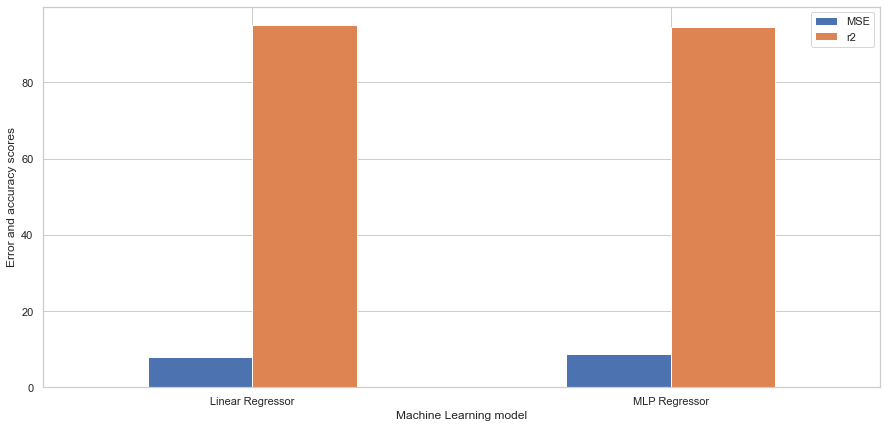

In [56]:
ax = err_details.plot(x="Model", y=['MSE','r2'], kind='bar',figsize=(15,7),rot=0)
ax.set_xlabel('Machine Learning model')
ax.set_ylabel('Error and accuracy scores')
ax.figure.savefig('ETO_estimate.png')

Linear Regressor found to be better, so I'm using linear regressor model for prediction

In [57]:
x_test["Pred_ET0"] = lr.predict(x_test).reshape(-1,1)

let's see the error on predicted and actual data

In [58]:
print(r2_score(x_test['Pred_ET0'],y_test)*100)

95.09503139663849


In [59]:
print(mean_squared_error(x_test['Pred_ET0'],y_test)*100)

7.84198106111251


we got the good result, now filling the empty rows of ET0

In [60]:
ETO_New_Pred_Feat = ETO_pred_weather.drop(['ET0 [result]'],axis=1)
ETO_New_Pred_Feat=ETO_New_Pred_Feat.set_index(['Unnamed: 0'])
ETO_pred_weather['ET0 [result]'] = lr.predict(ETO_New_Pred_Feat).reshape(-1,1)

/var/folders/4t/2rm5x3sn057fc9fch2_h0p_c0000gn/T/ipykernel_34347/1477771835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ETO_pred_weather['ET0 [result]'] = lr.predict(ETO_New_Pred_Feat).reshape(-1,1)


In [61]:
ETO_pred_weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,7.19,64.95,7.0,3.190711
839,2016-09-08,0,0.0,0.0,0.0,6748,0,22.57,21.85,70.00,16.6,2.055144
1268,2017-12-09,24,0.0,3.3,5.2,6844,0,0.37,-1.62,99.22,1.0,-0.158416
1269,2017-12-10,9,7.0,2.2,4.8,6826,905,0.17,-3.55,99.66,0.5,-0.156047
1270,2017-12-11,8,4.0,3.2,5.9,6766,1030,1.60,-0.55,98.52,1.6,-0.034495
...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2021-05-16,281,0.4,1.8,4.7,6874,0,11.41,6.07,92.04,9.8,3.174854
2550,2021-05-17,26,0.0,2.3,4.4,7070,0,9.45,8.95,99.87,9.3,0.573881
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,8.95,99.86,10.3,2.282766
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,8.38,99.86,10.6,2.001078


In [62]:
ET0_new_weather = df_weather_cp[df_weather_cp['ET0 [result]'].notnull()]
ET0_new_weather = pd.concat([ET0_new_weather,ETO_pred_weather])
ET0_new_weather

,Unnamed: 0,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result]
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,3.04,72.91,7.6,3.600000
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,7.23,74.69,10.5,2.900000
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,9.93,71.42,11.5,3.600000
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,8.45,74.45,11.4,4.200000
5,2014-05-19,261,0.0,3.0,6.4,6854,490,18.26,9.42,66.41,10.8,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2021-05-16,281,0.4,1.8,4.7,6874,0,11.41,6.07,92.04,9.8,3.174854
2550,2021-05-17,26,0.0,2.3,4.4,7070,0,9.45,8.95,99.87,9.3,0.573881
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,8.95,99.86,10.3,2.282766
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,8.38,99.86,10.6,2.001078


In [63]:
ET0_new_weather=ET0_new_weather.set_index(['Unnamed: 0'])

In [64]:
r = pd.date_range(start=ET0_new_weather.index.min(),end=ET0_new_weather.index.max(),freq='1D')

In [65]:
ET0_new_weather=ET0_new_weather[~ET0_new_weather.index.duplicated(keep='first')]
ET0_new_weather=ET0_new_weather.reindex(r)

In [66]:
ET0_new_weather.interpolate(limit_direction ='both',method='polynomial', order=3,inplace=True)

In [67]:
ET0_new_weather

,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result]
2014-05-14,159.0,0.0,1.4,3.3,6834.0,70.0,14.27,7.19,64.95,7.0,3.190711
2014-05-15,280.0,0.0,0.6,2.3,6894.0,500.0,13.51,3.04,72.91,7.6,3.600000
2014-05-16,186.0,3.4,0.8,2.7,6874.0,375.0,15.65,7.23,74.69,10.5,2.900000
2014-05-17,221.0,0.0,1.0,3.3,6874.0,565.0,17.46,9.93,71.42,11.5,3.600000
2014-05-18,255.0,0.0,2.1,5.5,6854.0,625.0,16.85,8.45,74.45,11.4,4.200000
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-16,361.0,0.4,2.1,4.7,7158.0,0.0,11.23,6.07,91.67,9.6,3.999306
2021-05-17,26.0,0.0,2.3,4.4,7070.0,0.0,9.45,8.95,99.87,9.3,0.573881
2021-05-18,311.0,0.0,1.4,5.0,6854.0,0.0,10.29,3.15,92.94,8.8,3.400000
2021-05-19,232.0,6.6,1.8,5.5,6864.0,0.0,11.39,7.50,90.32,9.4,3.000000


now merging the weather data

## plants dataset pre-processing

In [68]:
df_plants.shape

(4859, 15)

In [69]:
df_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Date       

We can see the missing data in different columns including the Plant Date

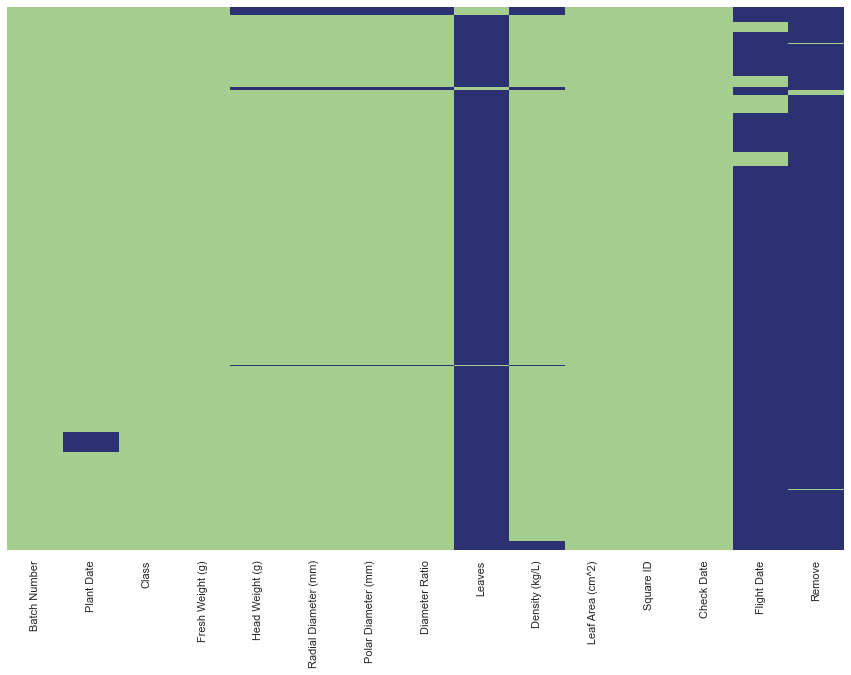

In [70]:
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(df_plants.isnull(),yticklabels=False,cbar=False,cmap="crest")
plt.savefig('plant_original.png')

In [71]:
df_plants.isnull().sum(axis = 0)

Batch Number               0
Plant Date               174
Class                      0
Fresh Weight (g)           1
Head Weight (g)          105
Radial Diameter (mm)     105
Polar Diameter (mm)      105
Diameter Ratio           107
Leaves                  4759
Density (kg/L)           187
Leaf Area (cm^2)           2
Square ID                  0
Check Date                 0
Flight Date             4387
Remove                  4789
dtype: int64

#### Here, we can see multiple columns have null data

In [72]:
df_plants.nunique()

Batch Number              64
Plant Date                37
Class                      5
Fresh Weight (g)        1133
Head Weight (g)          697
Radial Diameter (mm)     160
Polar Diameter (mm)      152
Diameter Ratio          1082
Leaves                    19
Density (kg/L)          3650
Leaf Area (cm^2)         925
Square ID                171
Check Date                63
Flight Date                3
Remove                     1
dtype: int64

In [73]:
df_planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2020-02-06 00:00:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2020-02-07 00:00:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2020-02-08 00:00:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2020-02-10 00:00:00,NaN,0.0,NaN,770,13944.0,7.0


In [74]:
df_plants_cp = df_plants.copy()
df_plants_cp.shape

(4859, 15)

In [75]:
df_plants_cp.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


#### changing columns name to be comfortably used by replacing space with '_'

In [76]:
df_plants_cp.columns = df_plants_cp.columns.str.replace(' ','_')

In [77]:
df_plants_cp.head()

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Check_Date,Flight_Date,Remove
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaT,NaN
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaT,NaN
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaT,NaN
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaT,NaN
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaT,NaN


In [78]:
df_plants_cp.nunique()

Batch_Number              64
Plant_Date                37
Class                      5
Fresh_Weight_(g)        1133
Head_Weight_(g)          697
Radial_Diameter_(mm)     160
Polar_Diameter_(mm)      152
Diameter_Ratio          1082
Leaves                    19
Density_(kg/L)          3650
Leaf_Area_(cm^2)         925
Square_ID                171
Check_Date                63
Flight_Date                3
Remove                     1
dtype: int64

In [79]:
#df_plants_cp['Crop']=0
#df_plants_cp['Region']=0
#df_plants_cp['Volume_Planted']=0
#df_plants_cp['Planting_Wk']=0
#for i in range(300):
#    d = df_plants_cp['Batch_Number'].iloc[i]
#    if pd.isna(df_plants_cp.iloc[i]['Flight_Date']):
#        if d in df_flight_cp['Batch_Number'].values:
#            #df_plants_cp.at[i,'Flight_Date']=df_flight_cp.loc[df_flight_cp['Batch_Number']==d].values[0]
#            df_plants_cp.at[i,'Flight_Date']=df_flight_cp.loc[df_flight_cp.Batch_Number == d,'Flight_Date'].values[0]

In [80]:
df_plants_cp['Crop']=0
df_plants_cp['Region']=0
df_plants_cp['Volume_Planted']=0
df_plants_cp['Planting_Wk']=0
for i in range(len(df_plants_cp)):
    d = df_plants_cp['Batch_Number'].iloc[i]
    if pd.isna(df_plants_cp['Flight_Date'].iloc[i]):
        if d in df_flight_cp['Batch_Number'].values:
            df_plants_cp.at[i,'Flight_Date']=df_flight_cp.loc[df_flight_cp.Batch_Number == d,'Flight_Date'].values[0]

    if pd.isna(df_plants_cp['Plant_Date'].iloc[i]):
        if d in df_planting['Planting_Batch'].values:
            df_plants_cp.at[i,'Plant_Date']=df_planting.loc[df_planting.Planting_Batch == d,'Plant_Date'].values[0]
            
    if d in df_planting['Planting_Batch'].values:
        df_plants_cp.at[i,'Crop']=df_planting.loc[df_planting.Planting_Batch == d,'Crop'].values[0]
        df_plants_cp.at[i,'Region']=df_planting.loc[df_planting.Planting_Batch == d,'Region'].values[0]
        df_plants_cp.at[i,'Volume_Planted']=df_planting.loc[df_planting.Planting_Batch == d,'Volume_Planted'].values[0]
        df_plants_cp.at[i,'Planting_Wk']=df_planting.loc[df_planting.Planting_Batch == d,'Planting_Wk'].values[0]

In [81]:
#if pd.isna(df_plants_cp['Plant_Date'].iloc[i]):
#        if d in df_planting['Planting_Batch'].values:
#            df_plants_cp.at[i,'Plant_Date']=df_planting.loc[df_planting.Planting_Batch == d,'Plant_Date'].values[0]

In [82]:
df_plants_cp = df_plants_cp[df_plants_cp.Remove != 'r']
df_plants_cp.drop('Remove', inplace=True, axis=1)

In [83]:
df_plants_cp = df_plants_cp.dropna(subset=['Flight_Date'])

In [84]:
#df_plants_cp = df_plants_cp.drop('Leaves',axis=1)

<AxesSubplot:>

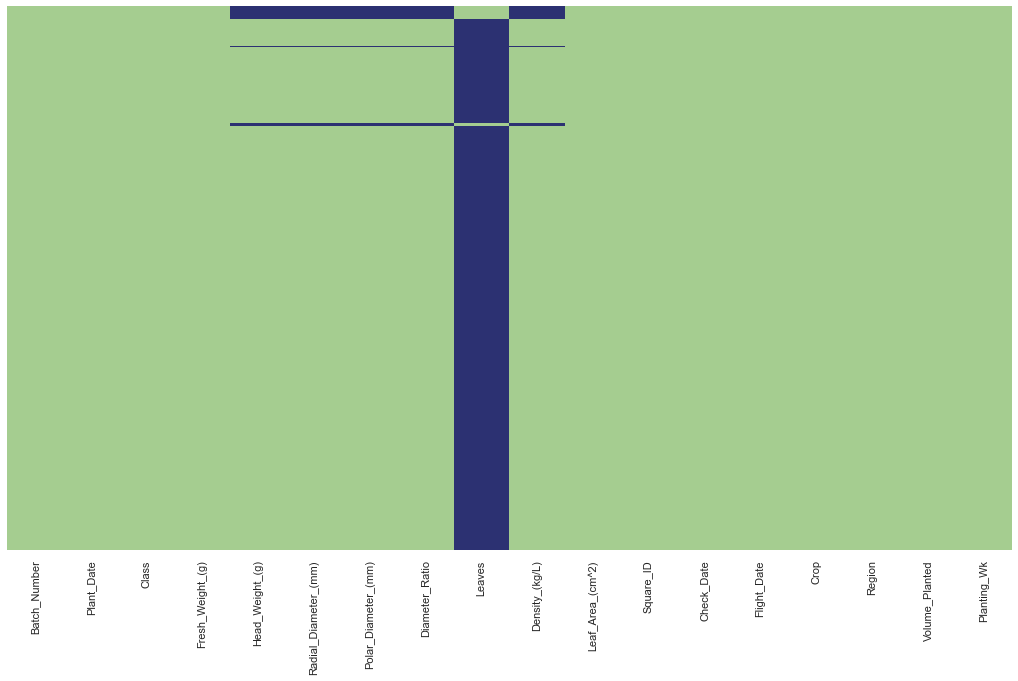

In [85]:
%matplotlib inline
plt.figure(figsize=(18,10))
sns.heatmap(df_plants_cp.isnull(),yticklabels=False,cbar=False,cmap="crest")

In [86]:
df_plants_cp.shape

(3334, 18)

In [87]:
df_plants_cp.loc[df_plants_cp['Batch_Number']==402]

,Batch_Number,Plant_Date,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),Square_ID,Check_Date,Flight_Date,Crop,Region,Volume_Planted,Planting_Wk
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,2020-04-30,3,0,155232,15
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,2020-04-30,3,0,155232,15
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,2020-04-30,3,0,155232,15
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,2020-04-30,3,0,155232,15
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,2020-04-30,3,0,155232,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,402,2020-04-11,5,1280.0,665.0,165.0,115.0,1.434783,NaN,0.405655,966.0,529,2020-06-04,2020-05-16,3,0,155232,15
159,402,2020-04-11,3,985.0,630.0,144.0,106.0,1.358491,NaN,0.547408,914.0,529,2020-06-04,2020-05-16,3,0,155232,15
160,402,2020-04-11,3,977.0,585.0,145.0,106.0,1.367925,NaN,0.501320,914.0,529,2020-06-04,2020-05-16,3,0,155232,15
161,402,2020-04-11,5,979.0,546.0,135.0,104.0,1.298077,NaN,0.550165,986.0,529,2020-06-04,2020-05-16,3,0,155232,15


In [88]:
df_plants_cp.shape

(3334, 18)

In [89]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number               0
Plant_Date                 0
Class                      0
Fresh_Weight_(g)           1
Head_Weight_(g)           98
Radial_Diameter_(mm)      98
Polar_Diameter_(mm)       98
Diameter_Ratio            99
Leaves                  3239
Density_(kg/L)            99
Leaf_Area_(cm^2)           1
Square_ID                  0
Check_Date                 0
Flight_Date                0
Crop                       0
Region                     0
Volume_Planted             0
Planting_Wk                0
dtype: int64

Removing rows with null fresh weight and leaf area. 

In [90]:
df_plants_cp = df_plants_cp.dropna(subset=['Fresh_Weight_(g)','Leaf_Area_(cm^2)'])

Removing rows which have both the head weight and leaves are null

In [91]:
rowstodrop = df_plants_cp['Leaves'].isnull() & df_plants_cp['Head_Weight_(g)'].isnull()
print(df_plants_cp[rowstodrop])
df_plants_cp = df_plants_cp.drop(df_plants_cp.index[rowstodrop])

     Batch_Number Plant_Date  Class  Fresh_Weight_(g)  Head_Weight_(g)  \
247           466 2020-05-18      5             108.0              NaN   
442           475 2020-05-21      1              92.0              NaN   

     Radial_Diameter_(mm)  Polar_Diameter_(mm)  Diameter_Ratio  Leaves  \
247                   NaN                  NaN             NaN     NaN   
442                   NaN                  NaN             NaN     NaN   

     Density_(kg/L)  Leaf_Area_(cm^2)  Square_ID Check_Date Flight_Date  Crop  \
247             NaN             263.0        426 2020-07-01  2020-07-01     3   
442             NaN             261.0        672 2020-07-03  2020-07-03     3   

     Region  Volume_Planted  Planting_Wk  
247       0          101976           21  
442       0          243768           21  


In [92]:
df_plants_cp.shape

(3331, 18)

merging weather data

In [93]:
ET0_new_weather.reset_index(inplace=True)

In [94]:
weather_columns = list(ET0_new_weather.columns)
for i in weather_columns:
    df_plants_cp[i]=0
#weather_columns.remove('date')
weather_columns.remove('index')

In [95]:
#weather_columns
#abc = (ET0_new_weather['date']<='2014-05-15') & (ET0_new_weather['date']>='2014-05-10')
#xyz = ET0_new_weather[abc]
#xyz


In [96]:
#df_plants_cp

In [97]:
def get_weather_data(plant_date,flight_date):
    data_mask = (ET0_new_weather['index']<=str(flight_date)) & (ET0_new_weather['index']>=str(plant_date))
    data = ET0_new_weather[data_mask]
    data = data.mean(axis=0)
    #data.reset_index(drop=True,inplace=True)
    return data
for i in range(len(df_plants_cp)):
    plant_date = df_plants_cp['Plant_Date'].loc[df_plants_cp.index[i]]
    flight_date = df_plants_cp['Flight_Date'].loc[df_plants_cp.index[i]]
    weather_data = get_weather_data(plant_date,flight_date)
    for j in weather_columns:
        df_plants_cp[j].loc[df_plants_cp.index[i]]=weather_data[j]
    

/var/folders/4t/2rm5x3sn057fc9fch2_h0p_c0000gn/T/ipykernel_34347/1570447205.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.mean(axis=0)
/Users/sundaracharya/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
df_plants_cp['days_to_check'] = (df_plants_cp['Check_Date']-df_plants_cp['Plant_Date']).dt.days
df_plants_cp['days_to_flight']= (df_plants_cp['Flight_Date']-df_plants_cp['Plant_Date']).dt.days

In [99]:
#df_plants_cp.to_excel("output.xlsx")

In [100]:
df_plants_cp.describe()

,Batch_Number,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),...,Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result],days_to_check,days_to_flight
count,3331.000000,3331.000000,3331.000000,3236.000000,3236.000000,3236.000000,3235.000000,95.000000,3235.000000,3331.000000,...,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,581.687481,2.961873,543.003492,233.399567,110.153894,102.161310,1.060400,10.810526,0.259961,472.523566,...,5.327078,6874.275031,56.673006,16.681145,11.183657,80.335374,12.550905,3.562866,38.939358,31.961273
std,81.639774,1.431956,307.985660,200.312549,40.847359,33.434796,0.166809,3.865545,0.137125,198.646417,...,0.430250,6.856739,34.988773,2.135219,2.184646,3.040569,2.282307,0.360949,6.792589,8.730121
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.285714,7.000000,0.014551,74.000000,...,4.648485,6865.200000,5.294118,10.325312,4.102813,73.766389,5.036111,2.894118,14.000000,6.000000
25%,514.000000,2.000000,288.500000,50.000000,80.000000,80.000000,1.000000,8.000000,0.181866,328.500000,...,5.009091,6866.947368,27.187500,15.777045,9.807556,77.589697,11.688235,3.237500,33.000000,30.000000
50%,608.000000,3.000000,529.000000,193.000000,123.000000,109.000000,1.068966,9.000000,0.238732,453.000000,...,5.370455,6873.696970,55.540541,17.047333,11.636667,80.115000,12.875862,3.684848,40.000000,33.000000
75%,649.000000,4.000000,775.000000,381.250000,140.000000,130.000000,1.166667,12.000000,0.312830,582.000000,...,5.642105,6881.647059,83.289474,18.485000,12.655143,82.436486,14.120588,3.796774,43.000000,37.000000
max,693.000000,5.000000,1978.000000,998.000000,185.000000,178.000000,1.687500,22.000000,2.387324,1276.000000,...,6.255556,6886.666667,139.285714,18.930000,13.333421,85.302941,14.631579,4.106061,54.000000,48.000000


In [101]:
#ax2 = df_plants_cp.plot.scatter(x='Flight_Date',y='Fresh_Weight_(g)',s=10,c='Batch_Number',colormap='viridis')

<AxesSubplot:xlabel='Check_Date', ylabel='Fresh_Weight_(g)'>

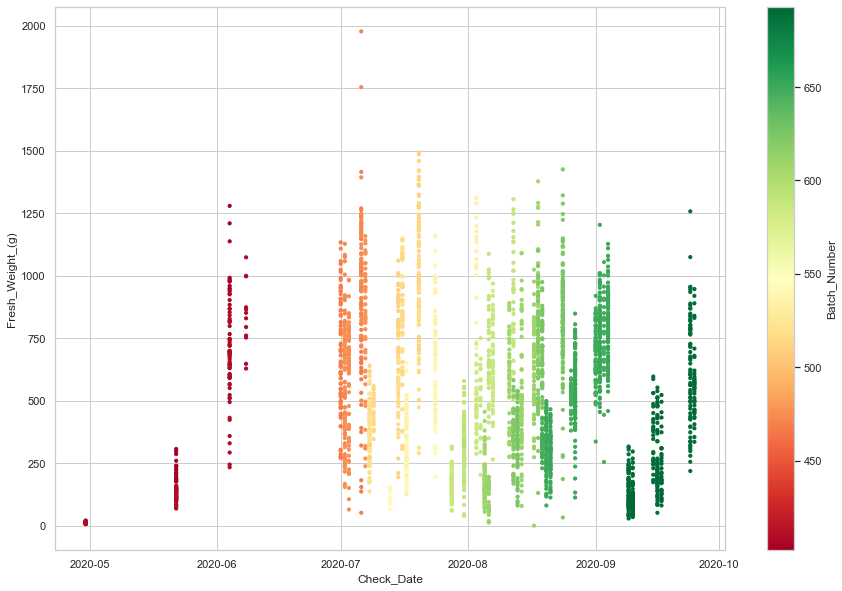

In [102]:
fig, ax = plt.subplots()
df_plants_cp.plot(kind='scatter', x='Check_Date', y='Fresh_Weight_(g)', s=10, c='Batch_Number', cmap='RdYlGn', ax=ax,figsize=(15,10)) 

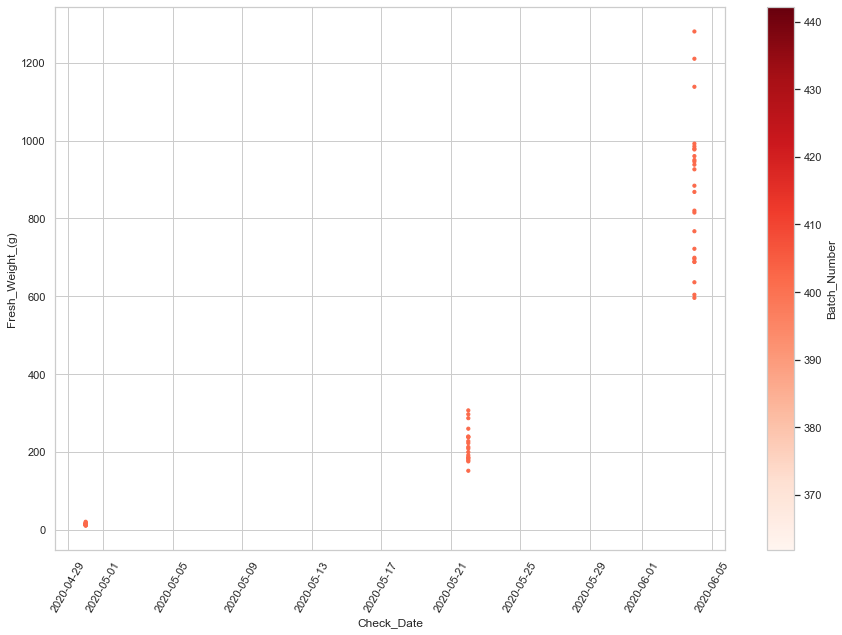

In [103]:
fig1, ax1 = plt.subplots()
abc=df_plants_cp.loc[df_plants_cp['Batch_Number']==402]
#abc.plot(kind='scatter', x='Flight_Date', y='Fresh_Weight_(g)', s=10, c='Batch_Number', cmap='Reds', ax=ax1,figsize=(15,10))
abc.plot(kind='scatter', x='Check_Date', y='Fresh_Weight_(g)', s=10, c='Batch_Number', cmap='Reds', ax=ax1,figsize=(15,10))
plt.xticks(rotation=60);

In [104]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number                  0
Plant_Date                    0
Class                         0
Fresh_Weight_(g)              0
Head_Weight_(g)              95
Radial_Diameter_(mm)         95
Polar_Diameter_(mm)          95
Diameter_Ratio               96
Leaves                     3236
Density_(kg/L)               96
Leaf_Area_(cm^2)              0
Square_ID                     0
Check_Date                    0
Flight_Date                   0
Crop                          0
Region                        0
Volume_Planted                0
Planting_Wk                   0
index                         0
Solar Radiation [avg]         0
Precipitation [sum]           0
Wind Speed [avg]              0
Wind Speed [max]              0
Battery Voltage [last]        0
Leaf Wetness [time]           0
Air Temperature [avg]         0
Air Temperature [min]         0
Relative Humidity [avg]       0
Dew Point [avg]               0
ET0 [result]                  0
days_to_check                 0
days_to_

In [105]:

#df_plants_cp['Density_(kg/L)'].fillna((df_plants_cp['Density_(kg/L)'].mean()), inplace=True)
#df_plants_cp['Leaf_Area_(cm^2)'].fillna((df_plants_cp['Leaf_Area_(cm^2)'].mean()), inplace=True)
#df_plants_cp['Fresh_Weight_(g)'].fillna((df_plants_cp['Fresh_Weight_(g)'].mean()), inplace=True)

In [106]:
df_plants_cp.describe()

,Batch_Number,Class,Fresh_Weight_(g),Head_Weight_(g),Radial_Diameter_(mm),Polar_Diameter_(mm),Diameter_Ratio,Leaves,Density_(kg/L),Leaf_Area_(cm^2),...,Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],ET0 [result],days_to_check,days_to_flight
count,3331.000000,3331.000000,3331.000000,3236.000000,3236.000000,3236.000000,3235.000000,95.000000,3235.000000,3331.000000,...,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,581.687481,2.961873,543.003492,233.399567,110.153894,102.161310,1.060400,10.810526,0.259961,472.523566,...,5.327078,6874.275031,56.673006,16.681145,11.183657,80.335374,12.550905,3.562866,38.939358,31.961273
std,81.639774,1.431956,307.985660,200.312549,40.847359,33.434796,0.166809,3.865545,0.137125,198.646417,...,0.430250,6.856739,34.988773,2.135219,2.184646,3.040569,2.282307,0.360949,6.792589,8.730121
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.285714,7.000000,0.014551,74.000000,...,4.648485,6865.200000,5.294118,10.325312,4.102813,73.766389,5.036111,2.894118,14.000000,6.000000
25%,514.000000,2.000000,288.500000,50.000000,80.000000,80.000000,1.000000,8.000000,0.181866,328.500000,...,5.009091,6866.947368,27.187500,15.777045,9.807556,77.589697,11.688235,3.237500,33.000000,30.000000
50%,608.000000,3.000000,529.000000,193.000000,123.000000,109.000000,1.068966,9.000000,0.238732,453.000000,...,5.370455,6873.696970,55.540541,17.047333,11.636667,80.115000,12.875862,3.684848,40.000000,33.000000
75%,649.000000,4.000000,775.000000,381.250000,140.000000,130.000000,1.166667,12.000000,0.312830,582.000000,...,5.642105,6881.647059,83.289474,18.485000,12.655143,82.436486,14.120588,3.796774,43.000000,37.000000
max,693.000000,5.000000,1978.000000,998.000000,185.000000,178.000000,1.687500,22.000000,2.387324,1276.000000,...,6.255556,6886.666667,139.285714,18.930000,13.333421,85.302941,14.631579,4.106061,54.000000,48.000000


In [107]:
df_plants_cp.isnull().sum(axis = 0)

Batch_Number                  0
Plant_Date                    0
Class                         0
Fresh_Weight_(g)              0
Head_Weight_(g)              95
Radial_Diameter_(mm)         95
Polar_Diameter_(mm)          95
Diameter_Ratio               96
Leaves                     3236
Density_(kg/L)               96
Leaf_Area_(cm^2)              0
Square_ID                     0
Check_Date                    0
Flight_Date                   0
Crop                          0
Region                        0
Volume_Planted                0
Planting_Wk                   0
index                         0
Solar Radiation [avg]         0
Precipitation [sum]           0
Wind Speed [avg]              0
Wind Speed [max]              0
Battery Voltage [last]        0
Leaf Wetness [time]           0
Air Temperature [avg]         0
Air Temperature [min]         0
Relative Humidity [avg]       0
Dew Point [avg]               0
ET0 [result]                  0
days_to_check                 0
days_to_

In [108]:
#df_plants_cp['days_to_check'].fillna((df_plants_cp['days_to_check'].mean()), inplace=True)

In [109]:
df_plants_new = df_plants_cp.copy()

In [110]:
df_plants_new = df_plants_new.dropna(subset=['Flight_Date','Head_Weight_(g)','Radial_Diameter_(mm)','Polar_Diameter_(mm)'])

In [111]:
df_plants_new=df_plants_new.drop(['Flight_Date','Plant_Date','Check_Date','Diameter_Ratio','Density_(kg/L)','Leaves'], axis=1)

In [112]:
#df_plants_new['Leaves'].fillna(int(df_plants_new['Leaves'].mean()), inplace=True)

In [113]:
df_plants_new.isnull().sum(axis = 0)

Batch_Number               0
Class                      0
Fresh_Weight_(g)           0
Head_Weight_(g)            0
Radial_Diameter_(mm)       0
Polar_Diameter_(mm)        0
Leaf_Area_(cm^2)           0
Square_ID                  0
Crop                       0
Region                     0
Volume_Planted             0
Planting_Wk                0
index                      0
Solar Radiation [avg]      0
Precipitation [sum]        0
Wind Speed [avg]           0
Wind Speed [max]           0
Battery Voltage [last]     0
Leaf Wetness [time]        0
Air Temperature [avg]      0
Air Temperature [min]      0
Relative Humidity [avg]    0
Dew Point [avg]            0
ET0 [result]               0
days_to_check              0
days_to_flight             0
dtype: int64

In [114]:
df_plants_new.dtypes

Batch_Number                 int64
Class                        int64
Fresh_Weight_(g)           float64
Head_Weight_(g)            float64
Radial_Diameter_(mm)       float64
Polar_Diameter_(mm)        float64
Leaf_Area_(cm^2)           float64
Square_ID                    int64
Crop                         int64
Region                       int64
Volume_Planted               int64
Planting_Wk                  int64
index                        int64
Solar Radiation [avg]      float64
Precipitation [sum]        float64
Wind Speed [avg]           float64
Wind Speed [max]           float64
Battery Voltage [last]     float64
Leaf Wetness [time]        float64
Air Temperature [avg]      float64
Air Temperature [min]      float64
Relative Humidity [avg]    float64
Dew Point [avg]            float64
ET0 [result]               float64
days_to_check                int64
days_to_flight               int64
dtype: object

In [115]:
df_plants_new= df_plants_new.replace(np.nan,0)

## feature importance

In [116]:
def modelRFFeatureImportance(dataset): 
    scaler = MinMaxScaler(feature_range = (0,1))
    # Scaling the data 
        
    scaled_data = scaler.fit_transform(dataset)
        
    training_data_len=math.ceil(len(dataset)*0.80)
    train, test = dataset.iloc[0:training_data_len,:],dataset.iloc[training_data_len:,:]
        
    # dividing the training and test data for model
    X_train = train.drop(['Head_Weight_(g)','Polar_Diameter_(mm)','Radial_Diameter_(mm)','Batch_Number'],axis=1)
    y_train =train[['Head_Weight_(g)','Polar_Diameter_(mm)','Radial_Diameter_(mm)']]
    X_test = test.drop(['Head_Weight_(g)','Polar_Diameter_(mm)','Radial_Diameter_(mm)','Batch_Number'],axis=1)
    y_test= test[['Head_Weight_(g)','Polar_Diameter_(mm)','Radial_Diameter_(mm)']]
    model = RandomForestRegressor()
    #grid search hyperparameters to train the model with optimal parameters
    parameter_search = {
        'n_estimators':[3,7,13],
        'max_features':['auto','log2'],
        'max_depth':[i for i in range(10,18)]
        }
    #estimating the best features in dataset
    grid = GridSearchCV(estimator=model,cv=10,refit=True,param_grid=parameter_search,scoring='neg_root_mean_squared_error')
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    best_score = grid.best_score_
        
        
    # predicting
    y_true = y_test.values
    y_pred = best_model.predict(X_test)
        
    important_features = best_model.feature_importances_
    features = X_train.columns
    index_feat = np.argsort(important_features)
        
    plt.figure(figsize=(20,10))
    plt.title('Feature Importances for Crop Yield Prediction')
    plt.barh(range(len(index_feat)), important_features[index_feat], color='red', align='center')
    plt.yticks(range(len(index_feat)), [features[i] for i in index_feat])
    plt.xlabel('Relative Importance of Variables to the outputs')
    plt.show()
    plt.savefig('Important_Features.png')
        

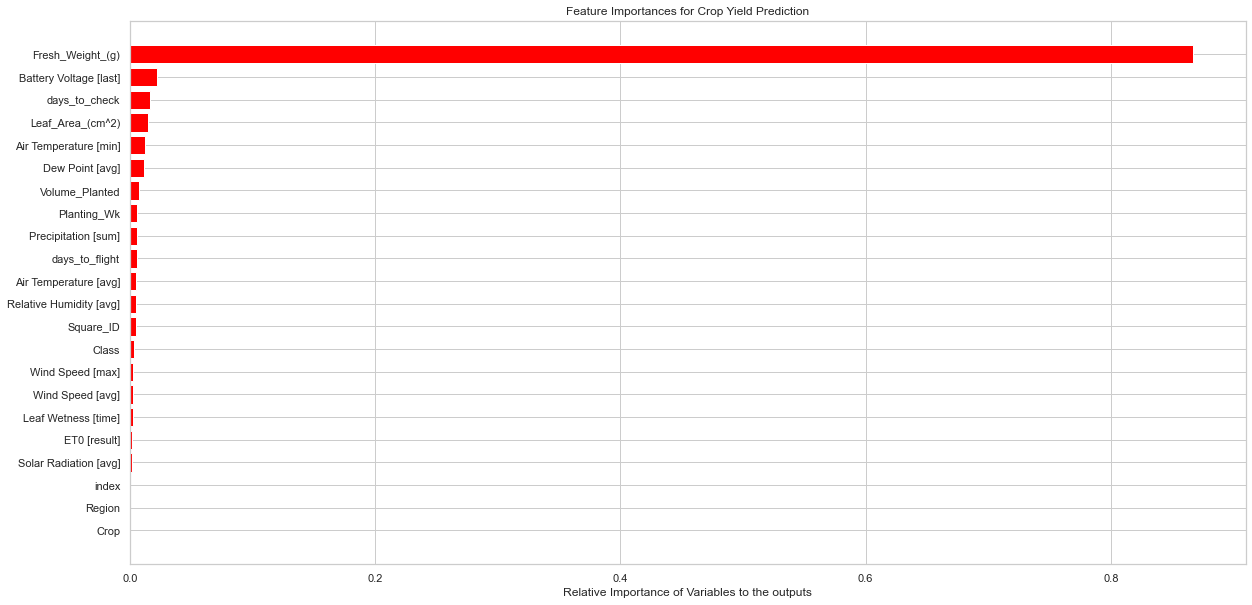

<Figure size 432x288 with 0 Axes>

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import math
modelRFFeatureImportance(df_plants_new)

## Data preparation for model

In [119]:
labels = ['Head_Weight_(g)','Polar_Diameter_(mm)','Radial_Diameter_(mm)']
cols = list(df_plants_new.columns)

In [120]:
features = cols
for lab in labels:
    if lab in cols:
        features.remove(lab)
features.remove('Batch_Number')

In [121]:
features,labels

(['Class',
  'Fresh_Weight_(g)',
  'Leaf_Area_(cm^2)',
  'Square_ID',
  'Crop',
  'Region',
  'Volume_Planted',
  'Planting_Wk',
  'index',
  'Solar Radiation [avg]',
  'Precipitation [sum]',
  'Wind Speed [avg]',
  'Wind Speed [max]',
  'Battery Voltage [last]',
  'Leaf Wetness [time]',
  'Air Temperature [avg]',
  'Air Temperature [min]',
  'Relative Humidity [avg]',
  'Dew Point [avg]',
  'ET0 [result]',
  'days_to_check',
  'days_to_flight'],
 ['Head_Weight_(g)', 'Polar_Diameter_(mm)', 'Radial_Diameter_(mm)'])

In [122]:
X=df_plants_new.loc[:, features]
y=df_plants_new.loc[:, labels]

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
!pip install catboost

In [125]:
#from catboost import CatBoostRegressor

#model = MultiOutputRegressor(CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1, loss_function='RMSE')).fit(X_train, y_train)

In [126]:
#from sklearn.metrics import mean_squared_error,mean_absolute_error
#import math
## make predictions
#y_predicted = model.predict(X_test)
#r2 = model.score(X_test,y_test) * 100
#mae = mean_absolute_error(y_test, y_predicted)
#mse = mean_squared_error(y_test, y_predicted)
#rmse = math.sqrt(mse)
#print('RMSE: %.3f' % rmse)
#print('R2: %.3f' % r2)

In [127]:
from skmultilearn.model_selection import iterative_train_test_split
regr = MultiOutputRegressor(Ridge(random_state=123)).fit(X_train, y_train)

In [128]:
import math
y_regr_pred = regr.predict(X_test)
r2 = regr.score(X_test,y_test)
mse = mean_squared_error(y_test, y_regr_pred)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)
print('R2: %.3f' % r2)

RMSE: 44.031
R2: 0.829


### random forest regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor
rand_regressor = RandomForestRegressor(n_estimators=15,random_state=12, max_depth=20)
rand_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=15, random_state=12)

In [130]:
y_rand_pred = rand_regressor.predict(X_test)
r2 = rand_regressor.score(X_test,y_test)
mse = mean_squared_error(y_test, y_rand_pred)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)
#print(y_rand_pred.shape,y_test.shape)
print('R2: %.3f' % r2)

RMSE: 31.203
R2: 0.914


## Linear regression with Polynomial degree

In [131]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression()

In [132]:
y_poly_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
r2 = r2_score(y_test,y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)
print('R2: %.3f' % r2)

RMSE: 30.195
R2: 0.920


In [133]:
y_test

,Head_Weight_(g),Polar_Diameter_(mm),Radial_Diameter_(mm)
996,61.0,110.0,119.0
2567,522.0,138.0,150.0
1585,37.0,88.0,75.0
402,228.0,104.0,125.0
3001,17.0,75.0,65.0
...,...,...,...
958,11.0,54.0,45.0
554,566.0,123.0,155.0
1882,29.0,60.0,70.0
1877,68.0,80.0,82.0


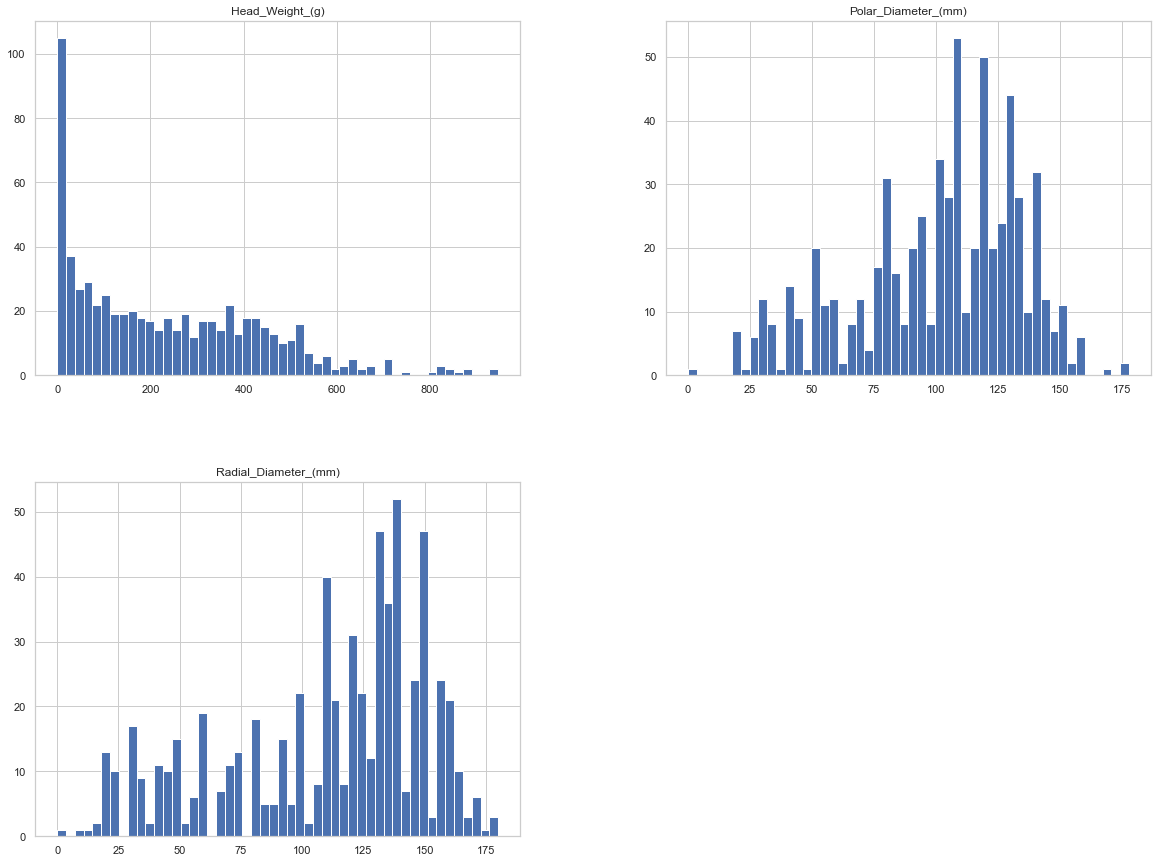

In [135]:
_ = y_test.hist(bins=50, figsize=(20,15))

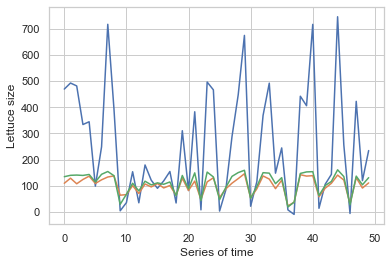

In [149]:
plt.plot(y_poly_pred[100:150])
#plt.plot(y_test[:30])
plt.ylabel('Lettuce size')
plt.xlabel('Series of time')
plt.show()

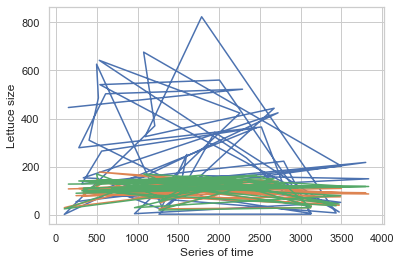

In [150]:
plt.plot(y_test[100:150])
plt.ylabel('Lettuce size')
plt.xlabel('Series of time')
plt.show()